(Placeholder for your group #)

(Placeholder for your names)

(Placeholder for your i-numbers)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 2

By completing and delivering the clinic tasks you will know how to :

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple logistic regression analysis;
- Evaluate classification models based on different metrics;
- Assess how your model performance can improve
- Reflect on the greater impact of the models you develop

---

## Important Dates

- Homework release: Fri, 7th Feb
- **Homework due**: Mon, 17th Feb late night (wildcards possible, apply to the group)

---

##  Some rules

* We have provided `TODO` comments in the code cells that you need to fill out with your solutions. For some questions, we have also provided `Your response` comments, where you should provide a textual answer.

* You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.



---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing (20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: The Aftermath (5 points)

## Context

Within DACS, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in the Netherlands !

Your mentor at the company Jerasimosu, has explained to you that the company is interested in a pricing model for used cars. 

- Jerasimosu: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Jerasimosu: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3

You should not use any other data source for this homework.

For some questions, you might need to slightly modify the data. But overall, you should avoid making any major changes to the data, which may affect your analysis.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)


**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [570]:
import pandas as pd

# Try loading with different parameters
try:
    df = pd.read_csv("data/Task1-2.ToyotaCorolla-raw.csv", on_bad_lines="skip", encoding="utf-8")
    print(df.head())  # Display first 5 rows
except Exception as e:
    print("Error encountered:", e)

# If you still face issues, inspect the file manually
with open("data/Task1-2.ToyotaCorolla-raw.csv", "r", encoding="utf-8") as file:
    for _ in range(10):  # Print first 10 lines
        print(file.readline().strip())


     Price  Age  Mileage FuelType  HP  MetColor  Automatic    CC  Doors  \
0  13500.0   23  46986.0   Diesel  90         1          0  2000      3   
1  11878.0   23  72937.0   Diesel  90         1          0  2000      3   
2  12050.0   24  41711.0   Diesel  90         1          0  2000      3   
3  12914.0   26  48000.0   Diesel  90         0          0  2000      3   
4  11878.0   30  38500.0   Diesel  90         0          0  2000      3   

   Weight Currency  
0    1165     EURO  
1    1165      CHF  
2    1165      CHF  
3    1165      CHF  
4    1170      CHF  
Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165,CHF
12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165,CHF
12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF
11187.0,32,61000.0,Diesel,90,0,0,2000,3,1170,CHF
14599.0,27,94612.0,Diesel,90,1,0,2000,3,1245,CHF
16068

**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [571]:
#TODO
import pandas as pd

# Check for NaN values
nan_summary = df.isna().sum()
print("Missing values per column:\n", nan_summary)

# Identify problematic rows
problematic_rows = df[df.isna().any(axis=1)]
print("Problematic rows:\n", problematic_rows)

# Fix or drop NaN values
# Option 1: Fill NaNs with a placeholder (if possible)
df_filled = df.fillna(method="ffill")  # Forward fill (use previous row value)
# df_filled = df.fillna(0)  # Alternatively, replace NaNs with 0

# Option 2: Drop problematic rows if they can't be fixed
df = df.dropna()

# Display the cleaned DataFrame
print("Cleaned DataFrame:\n", df_cleaned.head())

Missing values per column:
 Price        0
Age          0
Mileage      0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
Currency     0
dtype: int64
Problematic rows:
 Empty DataFrame
Columns: [Price, Age, Mileage, FuelType, HP, MetColor, Automatic, CC, Doors, Weight, Currency]
Index: []
Cleaned DataFrame:
      Price  Age  Mileage FuelType  HP  MetColor  Automatic    CC  Doors  \
0  13500.0   23  46986.0   Diesel  90         1          0  2000      3   
1  11878.0   23  72937.0   Diesel  90         1          0  2000      3   
2  12050.0   24  41711.0   Diesel  90         1          0  2000      3   
3  12914.0   26  48000.0   Diesel  90         0          0  2000      3   
4  11878.0   30  38500.0   Diesel  90         0          0  2000      3   

   Weight Currency  
0    1165     EURO  
1    1165      CHF  
2    1165      CHF  
3    1165      CHF  
4    1170      CHF  


C:\Users\elias\AppData\Local\Temp\ipykernel_17248\1347151360.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method="ffill")  # Forward fill (use previous row value)


We fixed the row that had the semiconon (;) as a column delimiter by putting a comma (,) instead.

**1.3 (4 pts): Compute the mean, median of the `Price` column.**

- Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.

Hint: Is all values in the `Price` column numerical?


In [572]:
#TODO
import pandas as pd
import re


print(df["Price"].describe())
# Clean the 'Price' column using regex
df["Price"] = df["Price"].astype(str).str.replace(r'[^\d.]', '', regex=True)  # Remove non-numeric characters

# Convert 'Price' column to numeric
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Compute mean and median
median_price = df["Price"].median()

# Print results
print("\n\nafter cleaning: ")
print(df["Price"].describe())
print("median: ", median_price)



count       1436
unique       311
top       7731.0
freq          94
Name: Price, dtype: object


after cleaning: 
count    1.436000e+03
mean     1.072319e+13
std      4.063509e+14
min      3.758000e+03
25%      7.343000e+03
50%      8.595000e+03
75%      1.032300e+04
max      1.539850e+16
Name: Price, dtype: float64
median:  8595.0


The problem is visible before we clean the "Price" col. There are 311 unique values and the mean is not automatically calculated. This is because there were some quotation marks and currency symbols in the price column.

**1.4 (4 pts): Convert Units**

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to EUR and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 EUR
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in CHF or GBP to EUR, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [573]:
import pandas as pd
import re

# Convert Prices to EUR based on 'Currency' column
def convert_price(row):
    if row["Currency"] == "CHF":
        return round(row["Price"] * 1.06)  # Convert CHF to EUR
    elif row["Currency"] == "GBP":
        return round(row["Price"] * 1.25)  # Convert GBP to EUR
    return row["Price"]  # Keep EUR as is

df["Price"] = df.apply(convert_price, axis=1)

# Clean 'Mileage' column (formerly 'Distance')
df["Mileage"] = df["Mileage"].astype(str).str.replace(r'[^\d.]', '', regex=True)  # Remove non-numeric characters
df["Mileage"] = pd.to_numeric(df["Mileage"], errors="coerce")

# Convert miles to km for GBP currency
def convert_mileage(row):
    if row["Currency"] == "GBP":
        return round(row["Mileage"] * 1.61)  # Convert miles to km
    return row["Mileage"]  # Keep km as is

df["Mileage"] = df.apply(convert_mileage, axis=1)

# Drop old 'Distance' and 'Currency' columns
df.drop(columns=[ "Currency"], inplace=True)

# Compute statistics for 'Price' and 'Mileage'
price_stats = {
    "Min Price": df["Price"].min(),
    "Mean Price": df["Price"].mean(),
    "Median Price": df["Price"].median(),
    "Max Price": df["Price"].max(),
}

mileage_stats = {
    "Min Mileage": df["Mileage"].min(),
    "Mean Mileage": df["Mileage"].mean(),
    "Median Mileage": df["Mileage"].median(),
    "Max Mileage": df["Mileage"].max(),
}

# Display results
print("Price Statistics (in EUR):", price_stats)
print("Mileage Statistics (in km):", mileage_stats)

Price Statistics (in EUR): {'Min Price': 3983.0, 'Mean Price': 13403986778764.012, 'Median Price': 9111.0, 'Max Price': 1.9248124999999996e+16}
Mileage Statistics (in km): {'Min Mileage': 1.0, 'Mean Mileage': 68514.27646239554, 'Median Mileage': 63389.5, 'Max Mileage': 243000.0}


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [574]:
#TODO
# Remove cars with prices over 100,000
df = df[df["Price"] <= 100000]

# A. Average Price for Each Fuel Type
fuel_avg_price = df.groupby("FuelType")["Price"].mean()
print("Average Price for Each Fuel Type:\n", fuel_avg_price)

# Determine which fuel type has the highest average price
highest_fuel_price = fuel_avg_price.idxmax()
print(f"The fuel type with the highest average price is: {highest_fuel_price}")

# B. Average Price for Different Numbers of Doors
doors_avg_price = df.groupby("Doors")["Price"].mean()
print("Average Price for Each Number of Doors:\n", doors_avg_price)

# Determine which number of doors has the highest average price
highest_doors_price = doors_avg_price.idxmax()
print(f"The number of doors with the highest average price is: {highest_doors_price}")


Average Price for Each Fuel Type:
 FuelType
CNG        8913.294118
Diesel    10465.464516
Petrol     9921.970705
Name: Price, dtype: float64
The fuel type with the highest average price is: Diesel
Average Price for Each Number of Doors:
 Doors
2     7417.500000
3     9393.082126
4     9117.333333
5    10680.995549
Name: Price, dtype: float64
The number of doors with the highest average price is: 5


**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

In [575]:
df.sample(10)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
753,9111.0,68,80426.0,Petrol,110,1,0,1600,3,1055
858,8013.0,65,64772.0,Petrol,110,1,0,1600,3,1050
630,8195.0,67,127000.0,Diesel,72,1,0,2000,5,1135
1412,9111.0,69,42800.0,Petrol,110,1,0,1600,3,1050
975,9065.0,59,46929.0,Petrol,86,1,0,1300,3,1025
800,9152.0,61,73894.0,Petrol,110,1,0,1600,3,1065
1030,9844.0,60,28500.0,Petrol,86,1,1,1300,3,1045
1372,6180.0,76,57263.0,Petrol,110,1,0,1600,3,1050
260,11441.0,39,50873.0,Petrol,110,1,0,1600,5,1075
317,9065.0,42,37000.0,Petrol,97,1,0,1400,3,1025


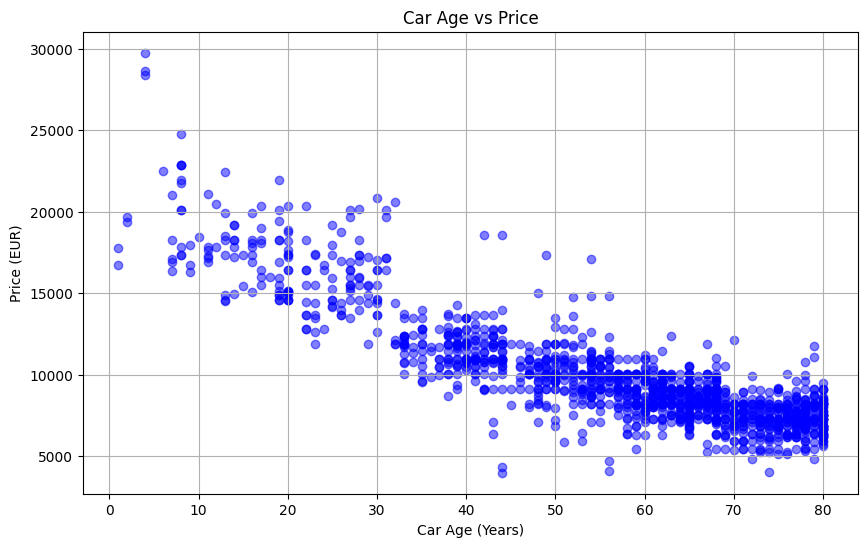

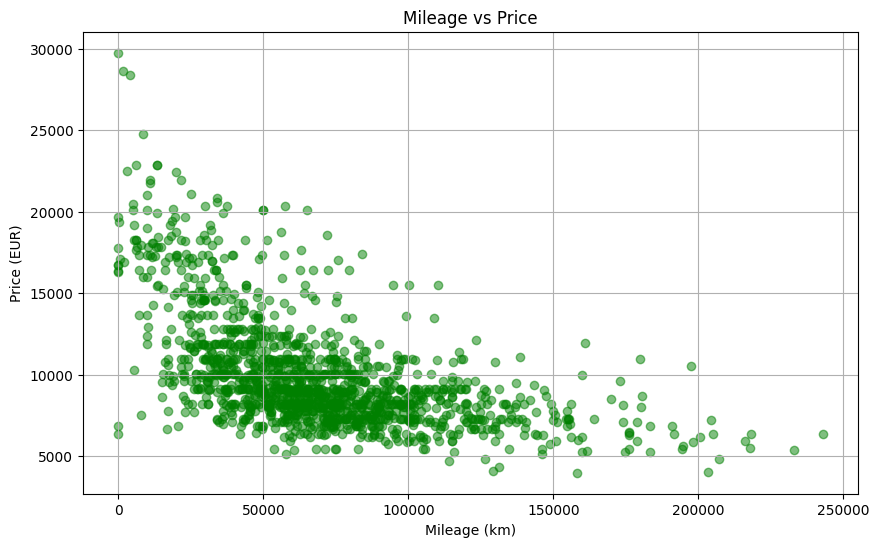

In [576]:
#TODO
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Calculate Car Age (current year - car year)
current_year = datetime.now().year
df['Age']

# 2. Scatter Plot: Car Age vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Price'], alpha=0.5, color='blue')
plt.title("Car Age vs Price")
plt.xlabel("Car Age (Years)")
plt.ylabel("Price (EUR)")
plt.grid(True)
plt.show()

# 3. Scatter Plot: Mileage vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Mileage'], df['Price'], alpha=0.5, color='green')
plt.title("Mileage vs Price")
plt.xlabel("Mileage (km)")
plt.ylabel("Price (EUR)")
plt.grid(True)
plt.show()


**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [577]:
#TODO
import pandas as pd

# 1. Calculate Pearson Correlation between Price and Mileage
pearson_corr = df['Price'].corr(df['Mileage'], method='pearson')
print(f"Pearson Correlation between Price and Mileage: {pearson_corr}")

# 2. Calculate Spearman Correlation between Price and Mileage
spearman_corr = df['Price'].corr(df['Mileage'], method='spearman')
print(f"Spearman Correlation between Price and Mileage: {spearman_corr}")


Pearson Correlation between Price and Mileage: -0.5605886222624177
Spearman Correlation between Price and Mileage: -0.6013721390188091


In [578]:
df.sample(10)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
142,16940.0,16,20629.0,Petrol,110,1,0,1600,4,1090
560,10750.0,54,39000.0,Petrol,97,0,0,1400,3,1025
502,9148.0,55,56743.0,Petrol,110,0,0,1600,3,1045
96,15950.0,19,25948.0,Petrol,97,1,0,1400,3,1100
865,10027.0,58,63870.0,Diesel,72,0,0,2000,5,1135
545,11446.0,56,45336.0,Petrol,110,1,0,1600,5,1080
1133,7096.0,72,106108.0,Petrol,110,1,0,1600,3,1050
1150,7096.0,78,100487.0,Petrol,110,0,0,1600,4,1035
1134,5448.0,72,105856.0,Petrol,86,0,0,1300,3,1015
323,11858.0,39,34599.0,Petrol,110,1,0,1600,5,1075



B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

Your Response:

//**//
The absolute higher value is the correlation of price and mileage with 0.6. Honestly no clue. 

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building the linear regression model, you need to implement some helper functions.

 Implement the `accuracy` , `precision`, `recall` and `f1_score` functions. 

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

- Compare the results with the implementation in `sklearn` and see if they match.

In [579]:
#TODO
def accuracy(true_labels, predicted_labels):
    return np.mean(true_labels == predicted_labels)

def precision(true_labels, predicted_labels):
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))
    fp = np.sum((true_labels == 0) & (predicted_labels == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall(true_labels, predicted_labels):
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))
    fn = np.sum((true_labels == 1) & (predicted_labels == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score_custom(true_labels, predicted_labels):
    p = precision(true_labels, predicted_labels)
    r = recall(true_labels, predicted_labels)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0



**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [580]:
#TODO
import pandas as pd

# One-Hot-Encoding mit Vermeidung von Multikollinearität
df_encoded = pd.get_dummies(df, columns=['FuelType'], drop_first=True)

# Anzahl der Spalten nach One-Hot-Encoding
num_columns = df_encoded.shape[1]

print(f"Amount of columns after the One-Hot-Encoding: {num_columns}")


Amount of columns after the One-Hot-Encoding: 11


We should avoid having multicollinearity because it will add redundant information. It will introduce Variables that are linearly dependent, because n - 1, where n is the amount of categories that are One-Hot encoded, are enough to determine the nth column.

B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


In [581]:
#TODO
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_samples = X_train.shape[0]
test_samples = X_test.shape[0]

print(f"Amount of trainingssamples: {train_samples}")
print(f"Amount of testsamples: {test_samples}")


Amount of trainingssamples: 1148
Amount of testsamples: 287


C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

Your Response:

//**//

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [582]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Define the columns to standardize
columns_to_scale = ['Age', 'Mileage', 'HP', 'CC', 'Weight']

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization only to the selected numerical columns
X = X.copy()
X.astype(float)

X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Add a constant column for regression
X = sm.add_constant(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print mean and standard deviation after scaling (only for the scaled columns)
print("Mean after standardization:\n", X[columns_to_scale].mean())
print("\nStandard deviation after standardization:\n", X[columns_to_scale].std())

Mean after standardization:
 Age       -7.922428e-17
Mileage    1.980607e-16
HP        -3.515577e-16
CC        -4.357335e-16
Weight     5.149578e-16
dtype: float64

Standard deviation after standardization:
 Age        1.000349
Mileage    1.000349
HP         1.000349
CC         1.000349
Weight     1.000349
dtype: float64


In [583]:
print(y_train[:5])
print(y_test[:5])

1128     7096.0
899      6868.0
1188     7784.0
311     10759.0
1145     6900.0
Name: Price, dtype: float64
753     9111.0
858     8013.0
630     8195.0
1412    9111.0
975     9065.0
Name: Price, dtype: float64


E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?

Your Response:

We should standardize the data before because otherwise the values of the training and test set are on different scales. This means if the mean of both splits are different, then the standardized version won't be comparable because the same values in both datasets would be changed differently.

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train a linear regression model using and evaluate its performance, follow these steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [584]:
print(X_train.dtypes)
print(y_train.dtypes)

const              float64
Age                float64
Mileage            float64
HP                 float64
MetColor             int64
Automatic            int64
CC                 float64
Doors                int64
Weight             float64
FuelType_Diesel       bool
FuelType_Petrol       bool
dtype: object
float64


In [ ]:
#TODO
import statsmodels.api as sm
X_train = X_train.astype(float)
# Train the Linear Regression model using OLS
# print(X_train)
model = sm.OLS(np.asarray(y_train), np.asarray(X_train))
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     610.5
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:41:08   Log-Likelihood:                -9903.4
No. Observations:                1148   AIC:                         1.983e+04
Df Residuals:                    1137   BIC:                         1.988e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8417.1731    420.110     20.036      0.0

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.

In [586]:
#TODO
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = results.predict(X_test)  # Predict using the trained model

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(y_pred[:5])
print(y_test[:5])

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Report the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Interpretation for your boss
print(f"The model's average error is approximately {rmse:.2f} units of the car's price.")

753     8309.957144
858     8810.656398
630     7560.454653
1412    8689.546375
975     9071.769609
dtype: object
753     9111.0
858     8013.0
630     8195.0
1412    9111.0
975     9065.0
Name: Price, dtype: float64
Root Mean Squared Error (RMSE): 1376.5631124805243
The model's average error is approximately 1376.56 units of the car's price.


Your Response:

The RMSE we calculated is 1349.81. This is the average difference between the predicted price and the actual price over all samples. They are also called residuals. We square the residuals and add them all up. If we have n residual we divide the sum by n and get the average. This then results in 2885 and indicates as before said to an average error of around 50 euros.

3. (2 pts) Report the R² score on the test dataset and interpret it.


In [589]:
#TODO
from sklearn.metrics import r2_score

# Assuming y_test contains actual values and y_pred contains predicted values
r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")


R² score: 0.8334


Your Response:

The Rsq value is 0.843. That means that the model is actually pretty good.

4.  (2 pts) Which features are statistically significant at a 5% significance level? 

In [ ]:
# Convert p-values to a Pandas Series and sort them
coefficients = pd.Series(results.pvalues, index=X_train.columns).sort_values()

# Format p-values to 5 decimal places
coefficients = coefficients.round(5)

# Display sorted p-values
print("Sorted p-values with 5 decimal places:\n", coefficients)

# Find statistically significant features (p-value < 0.05)
significant_features = coefficients[coefficients < 0.05]

# Print only the significant feature names
print("\nStatistically significant features at 5% level:")
print(significant_features.index.tolist())



Sorted p-values with 5 decimal places:
 Age                0.00000
const              0.00000
Weight             0.00000
Mileage            0.00000
HP                 0.00000
FuelType_Diesel    0.00000
CC                 0.00000
FuelType_Petrol    0.00020
Automatic          0.25675
MetColor           0.46791
Doors              0.66204
dtype: float64

Statistically significant features at 5% level:
['Age', 'const', 'Weight', 'Mileage', 'HP', 'FuelType_Diesel', 'CC', 'FuelType_Petrol']



The values that are signifcant are quite a lot. It is Age, the constant, weight, mileage, horse power, the diesel_fuel, CC and petrol_fuel. Both fuel_types are included which likely means that the CNG is also a significant variable. 

5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

In [621]:
# Convert coefficients to a Pandas Series and sort them
coefficients = pd.Series(results.params, index=X_train.columns).sort_values()


coefficients = coefficients.round(5)

# Display sorted coefficients
print("Sorted coefficients with 5 decimal places:\n", coefficients)

# Print only the significant feature names
print("\nStatistically significant features at 5% level:")
print(coefficients.index.tolist()[-2:])

Sorted coefficients with 5 decimal places:
 Age               -2129.28221
CC                 -584.98330
Mileage            -576.68798
Doors               -20.02855
MetColor             62.62420
Automatic           214.09337
HP                  761.25117
Weight              883.97544
FuelType_Petrol    1412.82325
FuelType_Diesel    3142.41661
const              8417.17310
dtype: float64

Statistically significant features at 5% level:
['FuelType_Diesel', 'const']


Your Response:

The features with the highest coefficients are the constant and the Diesel fueltype. This means that 

**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

Your Response:

We could also add the amount of owners the car had prior. This would be helpful because many people would agree that the more owners a car had the less it is worth. 
The second variable could be the car brand. Even if most car brands sell different models it will proabably be a good indicator of how much the price is.

**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Jerasimosu to discuss this issue. Indeed, Jerasimosu suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

Your Response:

The only thing we could come up with right is that havier cars are bigger in size. The size does indeed influence if and for how much a customer buys a car. 

**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.

In [ ]:
#TODO

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Jerasimosu is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [ ]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
print(data_df.head())

   Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel  90         1          0  2000      3    1165   
1  13750   23  72937   Diesel  90         1          0  2000      3    1165   
2  13950   24  41711   Diesel  90         1          0  2000      3    1165   
3  14950   26  48000   Diesel  90         0          0  2000      3    1165   
4  13750   30  38500   Diesel  90         0          0  2000      3    1170   

   sold_within_3_months  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  



**3.1 (2 pts): Preprocess the Data**
- （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [ ]:
#TODO

- (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

In [ ]:
#TODO

**3.2 (20 pts):  Logistic Regression Model**
1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [ ]:
#TODO

2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

In [ ]:
#TODO

3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

In [ ]:
#TODO

4. (2 pts) Fit a logistic regression model on the training dataset. Feel free to use either `statsmodels` or `sklearn`.

In [ ]:
#TODO

5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [ ]:
#TODO

6. (2 pts) Calculate the precision, recall, and F1-score.

In [ ]:
#TODO

7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly, for example by running some offer (special discount on cars). But which ones? How should you adjust the threshold for the decision boundary of the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

Your Response:

//**//

8. (6 pts) Try to find the optimal threshold that maximizes the F1-score. Implement any kind of method you see fit (e.g. binary search or grid search). What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

If you notice anything odd, report it and try to identify the reasons behind it.

In [ ]:
#TODO

**3.3(23 pts) Free model exploration**

Use any model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train your own classifier model to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility if needed. At this stage no need to optimize (yet). That will come at step 4.

In [ ]:
#TODO

2. (2 pts) Evaluate the model on the test set and report on hyperparameters or other details of the algorithm you chose.

In [ ]:
#TODO

3. (2 pts) Come up with a visualization (could be related to the model or to some variables (e.g. EDA plots) to demonstrate the difficulty (or not) of the problem. 

In [ ]:
#TODO

4. (17 pts) Try to come up with a model that improves the results both in the previous seciton but also your baseline model in 3.1. Make to sure to properly evaluate the model. No need to provide a visualization here but feel free to add any supporting evidence to your modeling.

Minimally (and for a high-grade) you should consider some form of regularization and proper cross-validation. 

Other things you can consider (in no particular order) are feature engineering, model robustness, hyperparameter tuning, ...

In [ ]:
#TODO

## Part 4 The Aftermath (5 pts)

Machine learning models are often evaluated based on accuracy, precision and recall, but these metrics do not always capture fairness. Fairness is a broader concept that depends on the context of the dataset and the decisions influenced by the model.

For this last question, you are asked to reflect on what fairness means in the context of this problem. More specifically, identify potential fairness concerns (at least 2) and suggest how they could be measured or mitigated.
Explain why fairness matters (or doesn’t) in this specific context.

*Hint: Think of the whole pipeline of data science: data collection, modeling, evaluation and identify sources of where the model might be unfair.*


Your Response:

//**//